In [3]:
import seaborn as sns
# import pandas as pd
import pandas; print(pandas.__version__)


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# For data processing
import numpy as np
import pandas as pd
import scipy.stats as stats

# For API usage
import requests as r

# For progress bar
from tqdm import tqdm

from sklearn.cluster import MiniBatchKMeans
import random


1.5.3


In [4]:
numerical_data = pd.read_csv('cleaned_1015.csv', usecols = ['BUDGET', 'VOTE_AVERAGE', "REVENUE"])
numerical_data.info()
numerical_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6971 entries, 0 to 6970
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VOTE_AVERAGE  6971 non-null   float64
 1   BUDGET        6971 non-null   int64  
 2   REVENUE       6971 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 163.5 KB


VOTE_AVERAGE    0
BUDGET          0
REVENUE         0
dtype: int64

In [5]:
numerical_data.head()

,VOTE_AVERAGE,BUDGET,REVENUE
0,7.6,237000000,2920357254
1,8.3,356000000,2799439100
2,7.7,460000000,2293000000
3,7.9,200000000,2187463944
4,7.3,245000000,2068223624


# We first do Kmeans clustering for BUDGET and VOTE_AVERAGE
# Visualise the data

<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

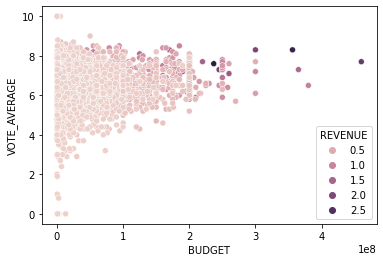

In [6]:
sns.scatterplot(data = numerical_data, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = 'REVENUE')

In [7]:
X = numerical_data[['BUDGET', 'VOTE_AVERAGE']]
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.labels_

<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

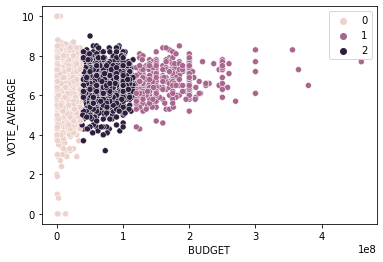

In [8]:
sns.scatterplot(data = numerical_data, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = kmeans.labels_) #labels/hues indicate the different clusters

# We can evaluate performance of the clustering algorithm using a Silhouette score which is a part of sklearn.metrics where a lower score represents a better fit.

In [9]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_, metric='euclidean')

0.6806768381310818

# We create the below loop to test and store different model results so that we can make a decision on the best number of clusters.

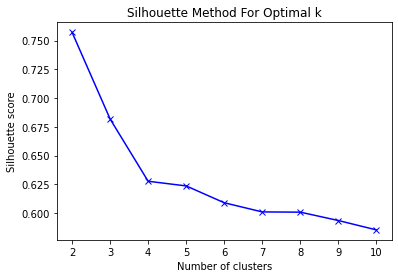

In [10]:
# Select the input features
X = numerical_data[['BUDGET', 'VOTE_AVERAGE']]
K = range(2, 11)
fits =[]

# Calculate the silhouette scores for each value of k
silhouette_scores = []

for k in K:
    # Train the model for current value of k on the data
    kmeans = KMeans(n_clusters=k).fit(X)

    fits.append(kmeans)

    # Get the cluster labels and calculate the silhouette score
    labels = kmeans.labels_
    score = silhouette_score(X, labels, metric='euclidean')
    
    # Append the score to the list of scores
    silhouette_scores.append(score)

# Plot the silhouette scores as a function of k
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method For Optimal k')
plt.show()

In [11]:
# K = range(2, 11)
# fits = []
# score = []


# for k in K:
#     # train the model for current value of k on training data
#     model = KMeans(n_clusters = k).fit(X_train)
    
#     # append the model to fits
#     fits.append(model)
    
#     # Append the silhouette score to scores
#     score.append(silhouette_score(X_train, model.labels_, metric='euclidean'))

# for 2 clusters

<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

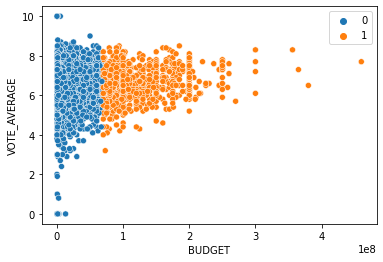

In [12]:
sns.scatterplot(data = X, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = fits[0].labels_)

# for 4 clusters

<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

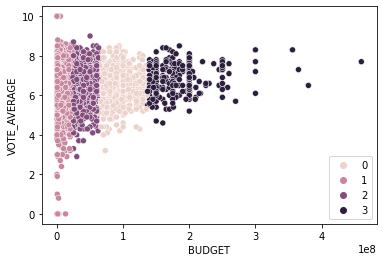

In [13]:
sns.scatterplot(data = X, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = fits[2].labels_)

# for 6 clusters

<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

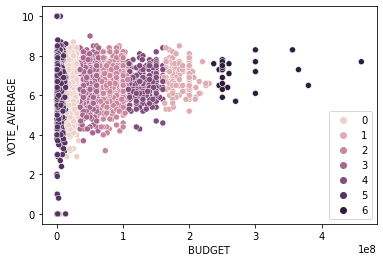

In [14]:
sns.scatterplot(data = X, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = fits[5].labels_)

# for 8 clusters

<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

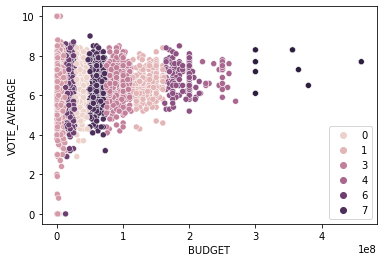

In [15]:
sns.scatterplot(data = X, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = fits[7].labels_)

# for 9 clusters

<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

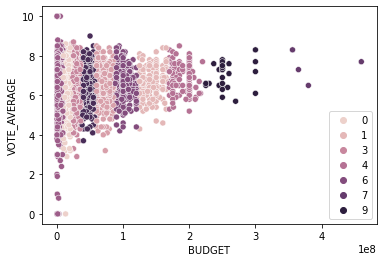

In [22]:
sns.scatterplot(data = X, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = fits[8].labels_)

# Hence we typically choose the point where the improvements in performance start to flatten or get worse, which is k =4

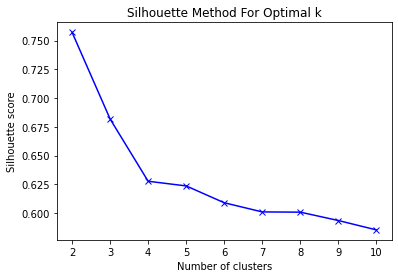

In [17]:
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method For Optimal k')
plt.show()

# We see k = 4 is probably the best we can do without overfitting. 

<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

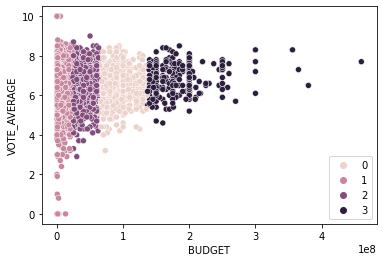

In [20]:
sns.scatterplot(data = X, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = fits[2].labels_)

# Inference: 
 we can see that for lower budget, vote average has a large range from 2 to 9. As the budget increases, we cna see the range of vote_average decreasing and it converge to a value around 4.5 to 8.5.


# We can then create a new dataframe that contains the cluster in one of the columns

In [29]:
X = numerical_data[['BUDGET', 'VOTE_AVERAGE']]
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
labels = kmeans.labels_

<Axes: xlabel='BUDGET', ylabel='VOTE_AVERAGE'>

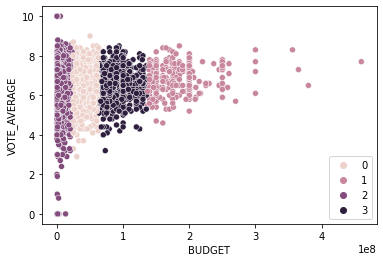

In [31]:
sns.scatterplot(data = numerical_data, x = 'BUDGET', y = 'VOTE_AVERAGE', hue = kmeans.labels_) #labels/hues indicate the different clusters

In [32]:
numerical_data['cluster'] = kmeans.labels_

numerical_data
numerical_data.to_csv('kmeans.csv')

,VOTE_AVERAGE,BUDGET,REVENUE,cluster
0,7.6,237000000,2920357254,1
1,8.3,356000000,2799439100,1
2,7.7,460000000,2293000000,1
3,7.9,200000000,2187463944,1
4,7.3,245000000,2068223624,1
...,...,...,...,...
6966,5.5,6000000,1500000,2
6967,6.0,2500000,1500000,2
6968,7.3,350000,1500000,2
6969,7.9,1200000,1500000,2


In [34]:
cluster_ranges = numerical_data.groupby('cluster')['cluster'].agg(['min', 'max'])
print(cluster_ranges)

         min  max
cluster          
0          0    0
1          1    1
2          2    2
3          3    3
